All in one training



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load data
data = pd.read_csv("final_metadata_acoustic_features.csv")

# Encode categorical variables
categorical_columns = ["Phoneme", "Dataset"]
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Handle missing values
data = data.dropna()

# Map target variable
label_mapping = {label: idx for idx, label in enumerate(data["label"].unique())}
data["label_numeric"] = data["label"].map(label_mapping)

# Feature selection
feature_columns = data.select_dtypes(include=["float64", "int64"]).columns.difference(["label_numeric"])
X = data[feature_columns]
y = data["label_numeric"]

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Unique classes in y_train: [0]
Class distribution in y_train:
label_numeric
0    408
Name: count, dtype: int64


ValueError: y_train contains only one class. Check data split or preprocessing.

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("final_metadata_acoustic_features.csv")

# Step 1: Drop irrelevant columns
columns_to_drop = ["subjectID", "file_path", "voiced_file_path", "Age", "Severity", "Dataset", "Phoneme"]
data = data.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Encode categorical features
categorical_columns = ["Sex"]  # Only keep 'Sex' as a categorical feature
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])

# Step 3: Handle missing values (drop rows with missing acoustic features)
# Drop rows with missing values in acoustic features
data = data.dropna()

# Step 4: Separate features (X) and target (y)
acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
X = data[acoustic_features]
y = data["label"]

# Step 5: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output results for validation
print("Preprocessing completed:")
print(f"Shape of feature matrix (X): {X_scaled.shape}")
print(f"Shape of target vector (y): {y.shape}")


Preprocessing completed:
Shape of feature matrix (X): (1910, 144)
Shape of target vector (y): (1910,)


In [6]:
# Step 7: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  # 'balanced' handles class imbalance
log_reg.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = log_reg.predict(X_test)


Logistic Regression Accuracy: 0.6806

Classification Report:
              precision    recall  f1-score   support

         ALS       0.64      0.90      0.75       172
          HC       0.73      0.47      0.57       220
         MSA       0.60      0.60      0.60        25
          PD       0.73      0.77      0.75       135
         PSP       0.54      0.62      0.58        21

    accuracy                           0.68       573
   macro avg       0.65      0.67      0.65       573
weighted avg       0.69      0.68      0.67       573



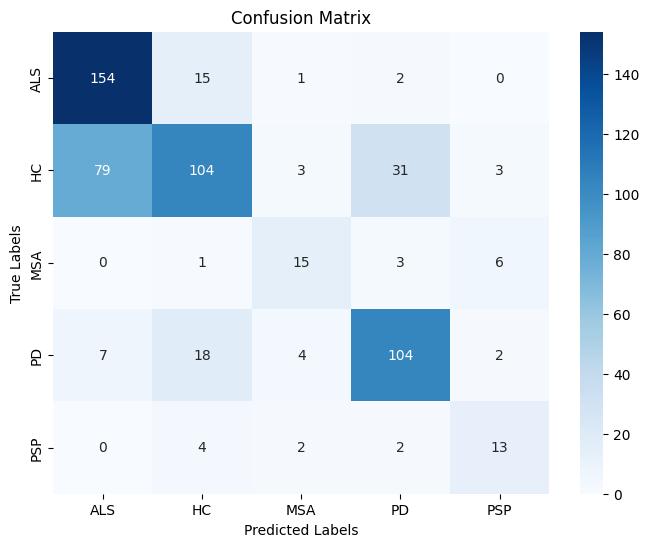

In [7]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


for each vowel


Processing vowel: A


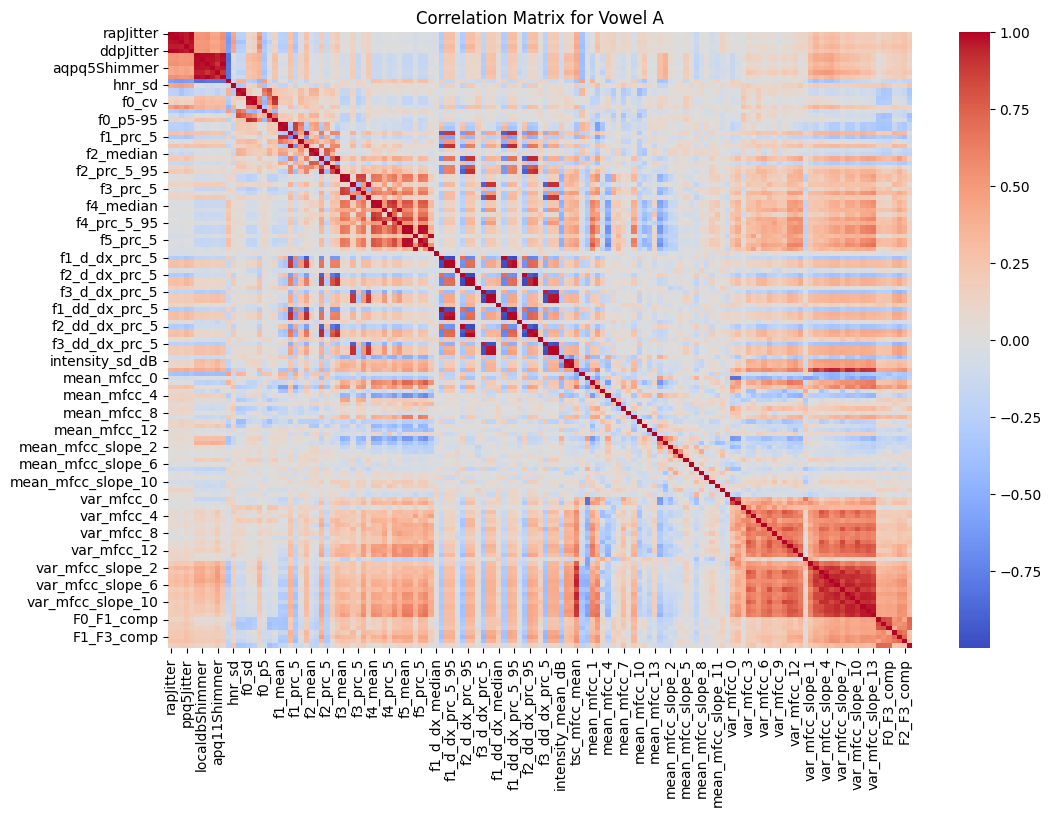

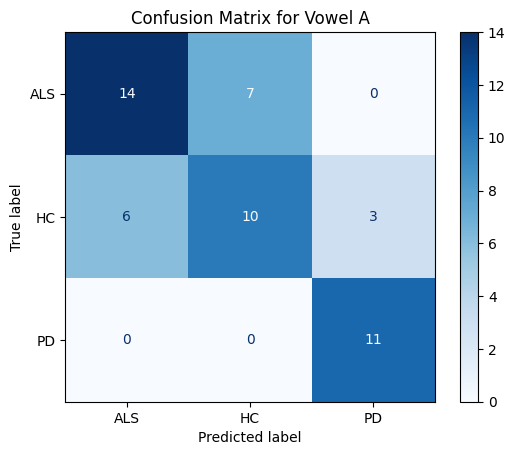

Processing vowel: E


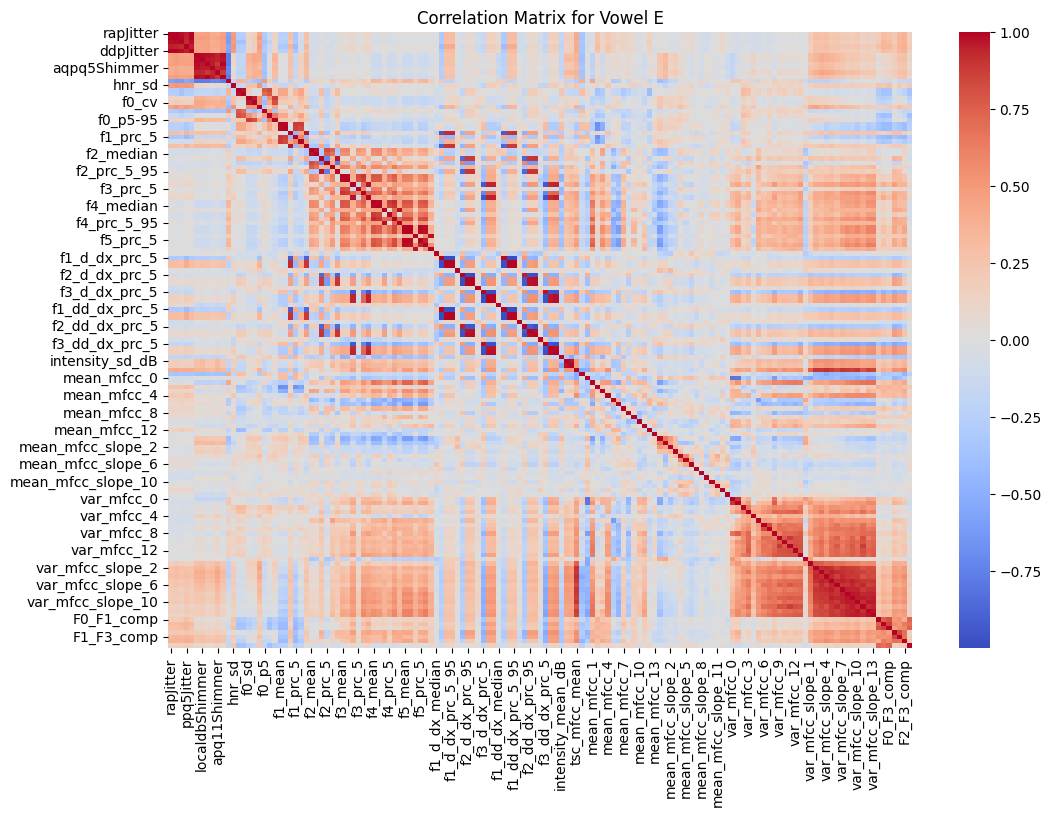

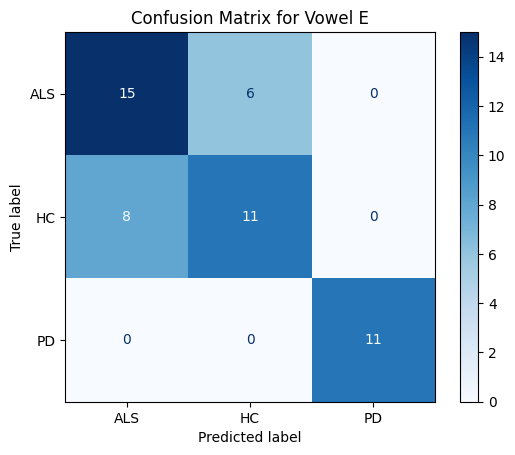

Processing vowel: I


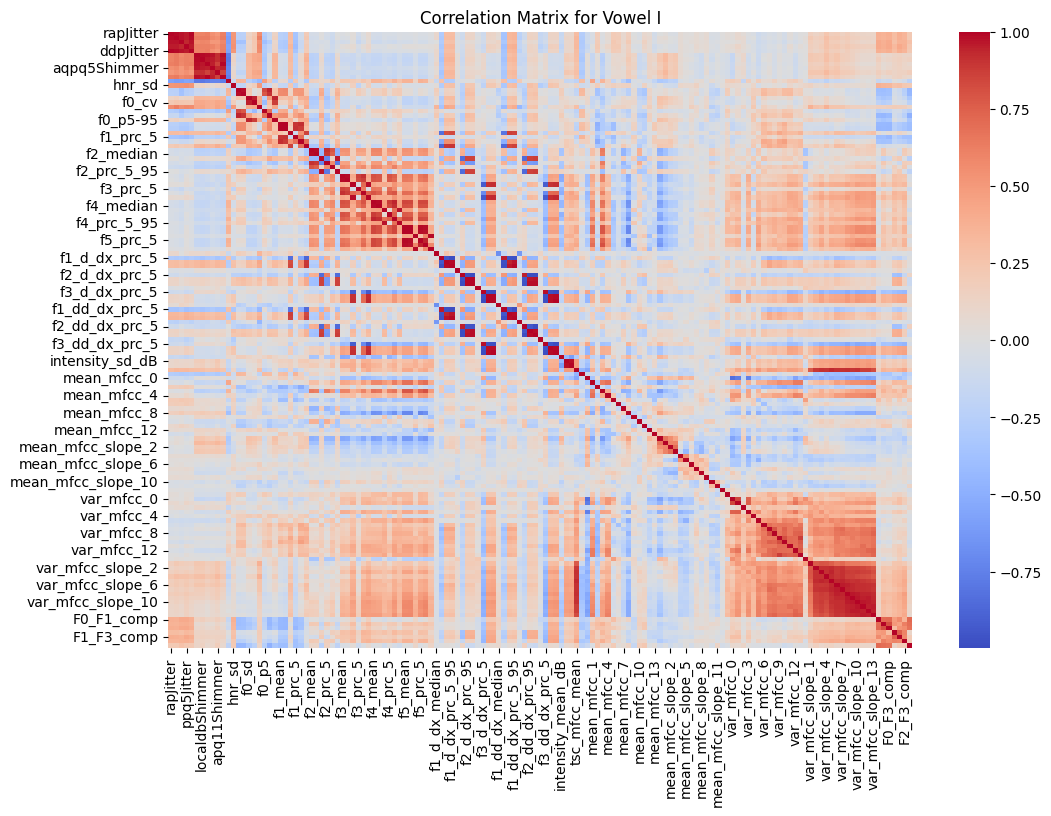

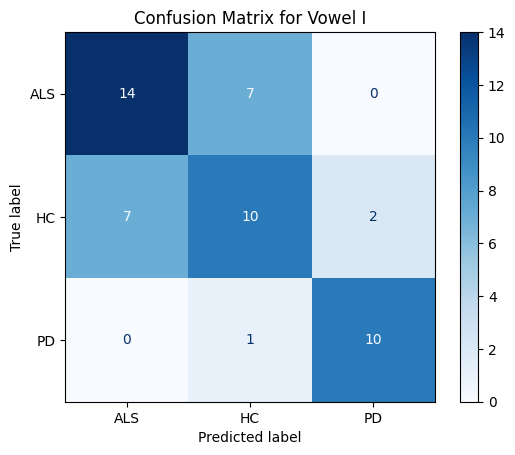

Processing vowel: O


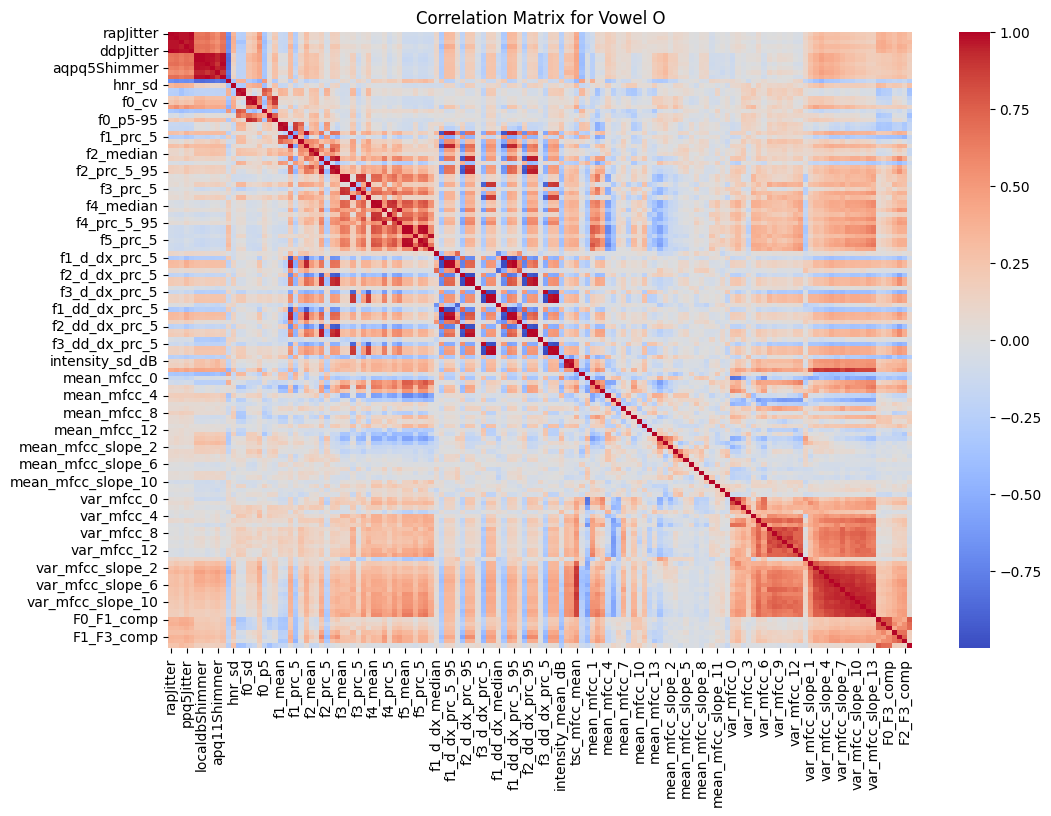

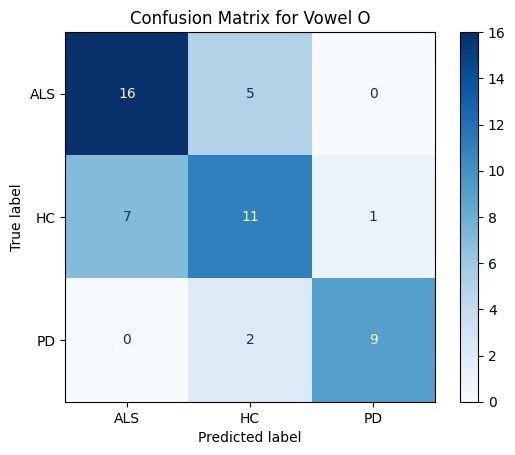

Processing vowel: U


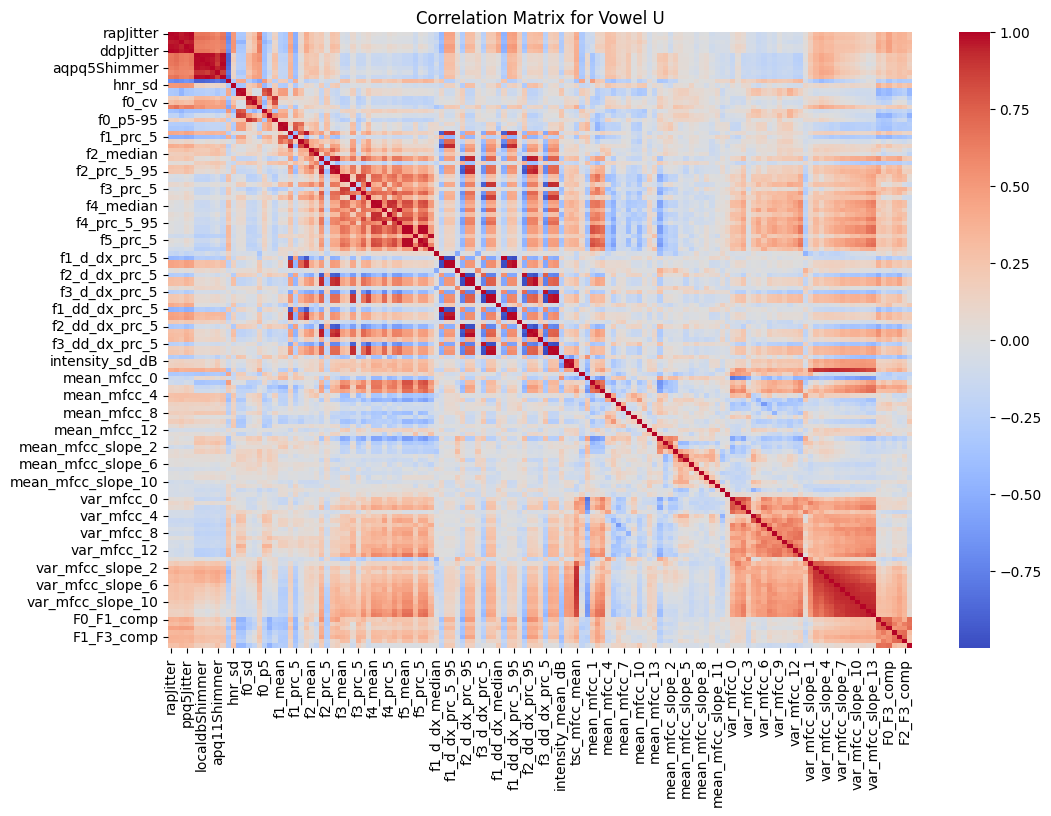

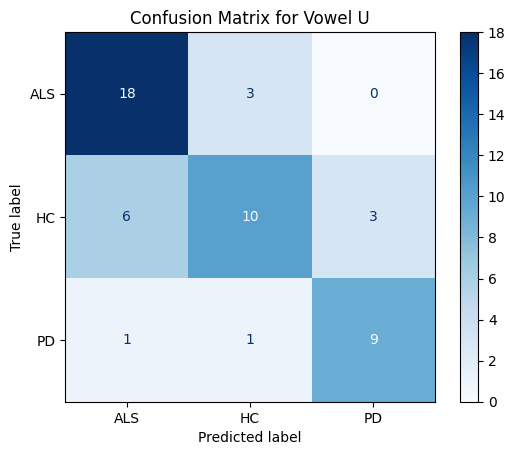

Processing vowel: a


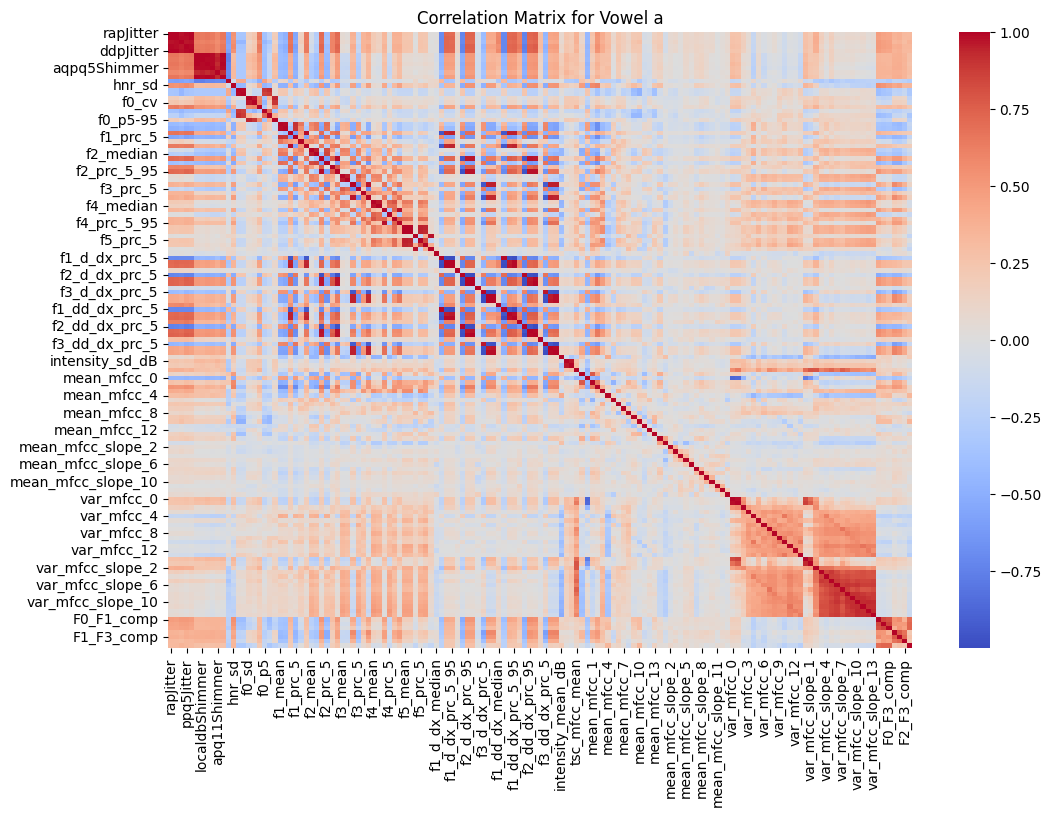

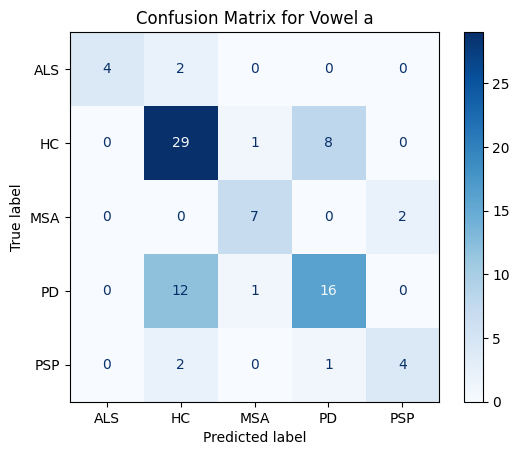

Processing vowel: i


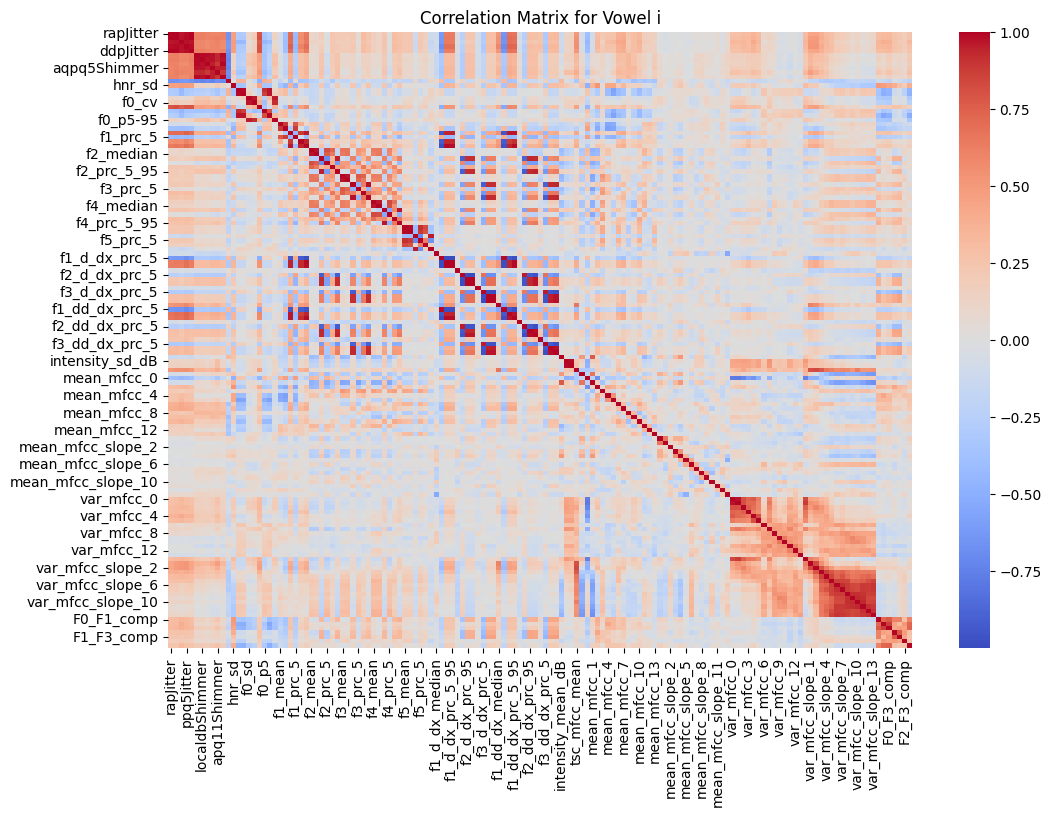

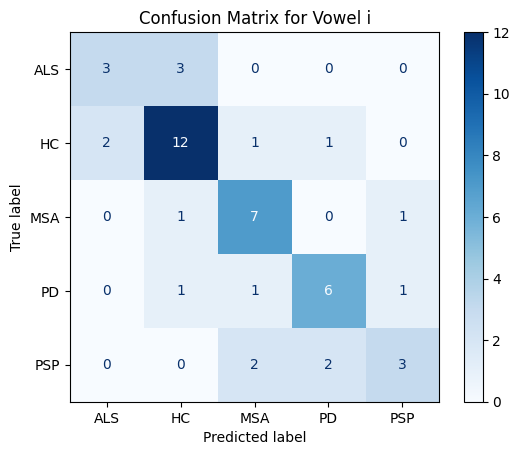


=== Results for Vowel A ===
Confusion Matrix:
[[14  7  0]
 [ 6 10  3]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score    support
ALS            0.700000  0.666667  0.682927  21.000000
HC             0.588235  0.526316  0.555556  19.000000
PD             0.785714  1.000000  0.880000  11.000000
accuracy       0.686275  0.686275  0.686275   0.686275
macro avg      0.691317  0.730994  0.706161  51.000000
weighted avg   0.676850  0.686275  0.677981  51.000000

=== Results for Vowel E ===
Confusion Matrix:
[[15  6  0]
 [ 8 11  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support
ALS            0.652174  0.714286  0.681818  21.00000
HC             0.647059  0.578947  0.611111  19.00000
PD             1.000000  1.000000  1.000000  11.00000
accuracy       0.725490  0.725490  0.725490   0.72549
macro avg      0.766411  0.764411  0.764310  51.00000
weighted avg   0.725290  0.725490  0.724104  51.00000

=== Results for Vowe

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the dataset
data = pd.read_csv("final_metadata_acoustic_features.csv")

# Drop rows where the target (label) is missing
data = data.dropna(subset=["label"])

# Extract vowels
vowels = data["Phoneme"].unique()

# Store results for comparison
vowel_results = {}

for vowel in vowels:
    print(f"Processing vowel: {vowel}")
    
    # Filter data for the specific vowel
    vowel_data = data[data["Phoneme"] == vowel]
    
    # Define feature columns (exclude unwanted columns like Phoneme, Dataset, subjectID)
    feature_columns = [col for col in vowel_data.columns if col not in ["subjectID", "file_path", "voiced_file_path", "Age", "Sex", "Severity", "Phoneme", "label", "Dataset"]]
    X = vowel_data[feature_columns]
    y = vowel_data["label"]
    
    # Handle missing values in X using a SimpleImputer (mean strategy)
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    
    # Generate correlation matrix
    corr_matrix = pd.DataFrame(X_imputed, columns=feature_columns).corr()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(f"Correlation Matrix for Vowel {vowel}")
    plt.show()
    
    # Check if there are at least two classes for the vowel
    if len(np.unique(y)) < 2:
        print(f"Skipping vowel {vowel} due to insufficient classes.")
        continue

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    log_reg.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = log_reg.predict(X_test_scaled)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for Vowel {vowel}")
    plt.show()
    
    # Store results
    vowel_results[vowel] = {
        "correlation_matrix": corr_matrix,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }

# Summarize results
for vowel, results in vowel_results.items():
    print(f"\n=== Results for Vowel {vowel} ===")
    print("Confusion Matrix:")
    print(results["confusion_matrix"])
    print("\nClassification Report:")
    print(pd.DataFrame(results["classification_report"]).transpose())
